In [2]:
import pandas as pd
import numpy as np
import plotly.express as ex

In [127]:
column=['Zipcode','Square Feet','Bedrooms','Bathrooms','Review Scores Rating','Accommodates',
        'Cleaning Fee','Free Parking','Wireless Internet','Cable TV','Prop_encoded','cancel_encoded','Price']
url = 'https://raw.githubusercontent.com/Air-BnB-2-BW/data-science/master/airbnb_BW.csv'
df = pd.read_csv(url, parse_dates=['Price'], usecols=column)
df['Price'] = pd.to_numeric(df['Price'])
df['Price'] = df['Price'].astype(float)
print(df.shape)
df.head()

(972, 13)


Zipcode  Square Feet  Bedrooms  ...  Prop_encoded  cancel_encoded  Price
0  78704.0        500.0       1.0  ...           1.0             2.0   85.0
1  78746.0       2800.0       4.0  ...           1.0             2.0  499.0
2  78741.0       1600.0       1.0  ...           1.0             0.0  450.0
3  78722.0        900.0       1.0  ...           1.0             2.0  150.0
4  78702.0       2700.0       3.0  ...           1.0             2.0  275.0

[5 rows x 13 columns]

In [128]:
df.describe()

Zipcode   Square Feet  ...  cancel_encoded       Price
count  9.720000e+02    972.000000  ...      972.000000  972.000000
mean   3.221273e+06    989.981481  ...        1.248971  199.920782
std    5.143417e+07   1276.106074  ...        0.969009  158.690492
min    2.108000e+03      0.000000  ...        0.000000   20.000000
25%    6.064550e+04    400.000000  ...        0.000000   99.000000
50%    9.003900e+04    800.000000  ...        2.000000  148.500000
75%    9.411200e+04   1300.000000  ...        2.000000  245.000000
max    9.410713e+08  32292.000000  ...        2.000000  995.000000

[8 rows x 13 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zipcode               972 non-null    float64
 1   Square Feet           972 non-null    float64
 2   Bedrooms              972 non-null    float64
 3   Bathrooms             972 non-null    float64
 4   Review Scores Rating  972 non-null    float64
 5   Accommodates          972 non-null    float64
 6   Cleaning Fee          972 non-null    float64
 7   Free Parking          972 non-null    float64
 8   Wireless Internet     972 non-null    float64
 9   Cable TV              972 non-null    float64
 10  Prop_encoded          972 non-null    float64
 11  cancel_encoded        972 non-null    float64
 12  Price                 972 non-null    float64
dtypes: float64(13)
memory usage: 98.8 KB


In [ ]:
ff = df[['Zipcode','Price']]
ff.columns=['fips','Price']
#ff.drop(columns=['Zipcode'], inplace=True)
print(ff.shape)
ff.head()

(972, 2)


fips  Price
0  78704.0   85.0
1  78746.0  499.0
2  78741.0  450.0
3  78722.0  150.0
4  78702.0  275.0

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

counties["features"][0]

{'geometry': {'coordinates': [[[-86.496774, 32.344437],
    [-86.717897, 32.402814],
    [-86.814912, 32.340803],
    [-86.890581, 32.502974],
    [-86.917595, 32.664169],
    [-86.71339, 32.661732],
    [-86.714219, 32.705694],
    [-86.413116, 32.707386],
    [-86.411172, 32.409937],
    [-86.496774, 32.344437]]],
  'type': 'Polygon'},
 'id': '01001',
 'properties': {'CENSUSAREA': 594.436,
  'COUNTY': '001',
  'GEO_ID': '0500000US01001',
  'LSAD': 'County',
  'NAME': 'Autauga',
  'STATE': '01'},
 'type': 'Feature'}

In [ ]:
from pandas import DataFrame, read_csv
from operator import is_not
from functools import partial
df_clean = pd.read_csv('data.csv',
                 lineterminator='\n', header=None, sep='\n')
df_clean = df_clean[0].str.split(',', expand=True)
filter(partial(is_not, None), df_clean)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34206 entries, 0 to 34205
Columns: 177 entries, 0 to 176
dtypes: object(177)
memory usage: 46.2+ MB


In [ ]:
print(df_clean.shape)
df_clean.head(100)

(34206, 177)


0  ...   176
0   ID;Listing Url;Scrape ID;Last Scraped;Name;Sum...  ...  None
1   5510293;https://www.airbnb.com/rooms/5510293;2...  ...  None
2   15339490;https://www.airbnb.com/rooms/15339490...  ...  None
3                                                  \r  ...  None
4   More info on my travels (and feedback on me as...  ...  None
..                                                ...  ...   ...
95  2661400;https://www.airbnb.com/rooms/2661400;2...  ...  None
96                                                 \r  ...  None
97  Please don't hesitate to contact me if you hav...  ...  None
98  9759758;https://www.airbnb.com/rooms/9759758;2...  ...  None
99                                                 \r  ...  None

[100 rows x 177 columns]

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = ff

import plotly.express as px

fig = px.choropleth_mapbox(ff, geojson=counties, locations='fips', color='Price',
                           color_continuous_scale="Viridis",
                           range_color=(0, 1000),
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'Price':'Price of Airbnb'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [199]:
import plotly.express as px

df = pd.read_csv('https://raw.githubusercontent.com/John-G-Thomas/compressedairbmb/master/NYC_AIRBNB.csv')
print(df.shape)
df.head()

(48895, 16)


id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [200]:
# Outliners
df = df[(df['price'] >= np.percentile(df['price'], 0.01))
&(df['price'] <= np.percentile(df['price'], 96))]
df.describe()

id  ...  availability_365
count  4.713200e+04  ...      47132.000000
mean   1.895195e+07  ...        110.329288
std    1.094314e+07  ...        130.626161
min    2.539000e+03  ...          0.000000
25%    9.461224e+06  ...          0.000000
50%    1.958989e+07  ...         41.000000
75%    2.898730e+07  ...        219.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

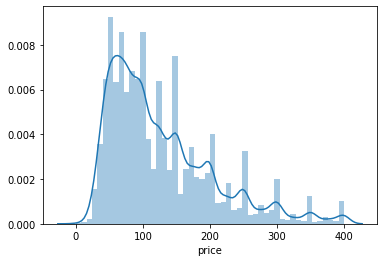

In [201]:
# is the target symmetric - it is skewed right
%matplotlib inline
import seaborn as sns
sns.distplot(df['price']);

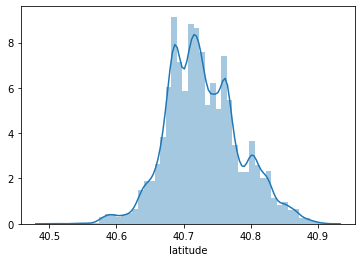

In [168]:
sns.distplot(df['latitude']);

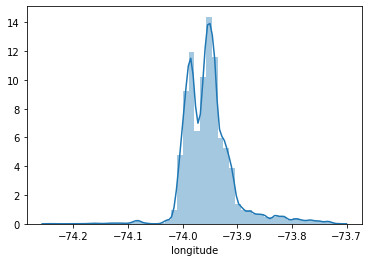

In [169]:
sns.distplot(df['longitude']);

In [225]:
vizexample('NYC')

<coroutine object vizexample at 0x7f187eb9be08>

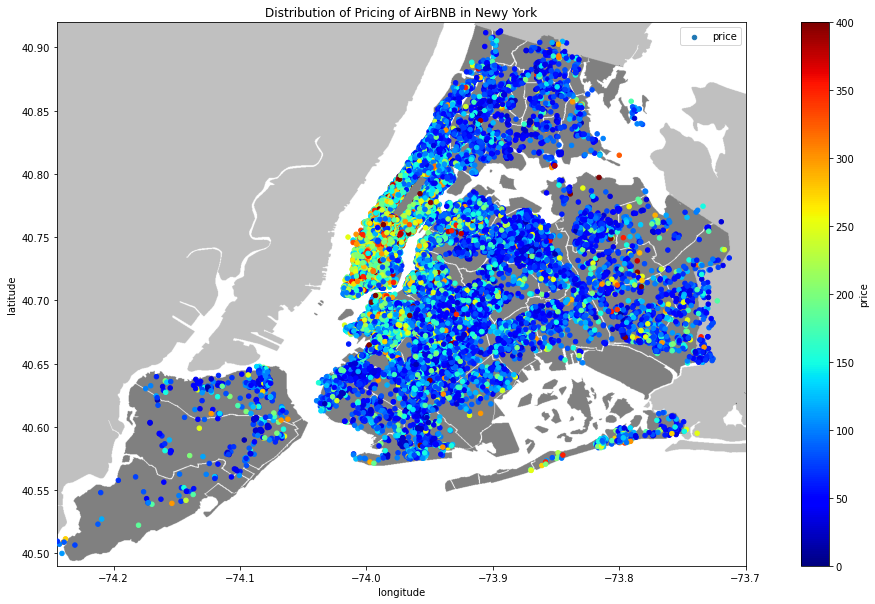

In [228]:
import urllib
#figure size
plt.figure(figsize=(20,10))
#open wiki image if new york 
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on lat and long
plt.imshow(nyc_img,zorder=0,extent=[-74.245, -73.7, 40.49,40.92])
ax=plt.gca()
#scatterolot
df.plot(kind='scatter', x='longitude', y='latitude', label='price', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=1, zorder=10)
plt.title('Distribution of Pricing of AirBNB in Newy York')
plt.legend()
plt.show()

In [247]:
url = 'https://raw.githubusercontent.com/John-G-Thomas/compressedairbmb/master/airbnb_llp.csv'
df = pd.read_csv(url, parse_dates=['Price'], index_col=0)
df['Price'] = pd.to_numeric(df['Price'])
df['Price'] = df['Price'].astype(float)
print(df.shape)
df.head()

(118914, 3)


Latitude  Longitude  Price
0  30.247761 -97.745272   85.0
1  30.254619 -97.753475  790.0
2  30.239962 -97.750308   75.0
3  30.244443 -97.749264  195.0
4  30.244307 -97.752996  200.0

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118914 entries, 0 to 120791
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Latitude   118914 non-null  float64
 1   Longitude  118914 non-null  float64
 2   Price      118914 non-null  float64
dtypes: float64(3)
memory usage: 3.6 MB


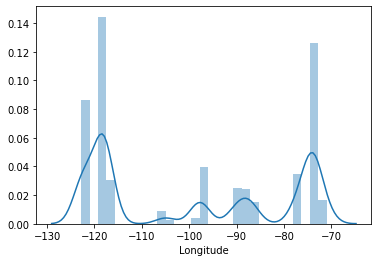

In [249]:
%matplotlib inline
import seaborn as sns
sns.distplot(df['Longitude']);

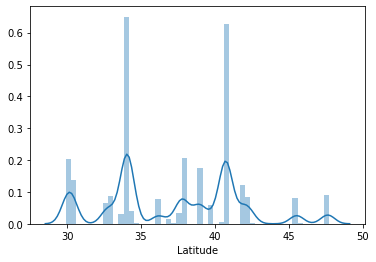

In [250]:
sns.distplot(df['Latitude']);

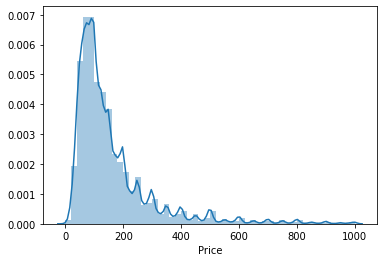

In [251]:
sns.distplot(df['Price']);

In [246]:
# Outliners
#df = df[(df['Price'] >= np.percentile(df['Price'], 0.01))
#&(df['Price'] <= np.percentile(df['Price'], 80))]
df.describe()

Latitude      Longitude          Price
count  118914.000000  118914.000000  118914.000000
mean       37.209271     -99.525770     157.298342
std         4.491554      20.214660     139.317495
min        29.898266    -122.833981       0.000000
25%        34.025443    -118.379977      75.000000
50%        37.763700     -97.784989     112.000000
75%        40.723696     -74.005118     189.000000
max        47.733358     -71.000100     999.000000

In [123]:
#Make more rows of around 120000 rows
Futuredf = pd.DataFrame(df, index=pd.date_range('1900-1-1', freq='1D', periods=118914))
Futuredf.head()

Latitude  Longitude  Price
1900-01-01       NaN        NaN    NaN
1900-01-02       NaN        NaN    NaN
1900-01-03       NaN        NaN    NaN
1900-01-04       NaN        NaN    NaN
1900-01-05       NaN        NaN    NaN

In [124]:
X=pd.merge(df,Futuredf, how='outer', left_index=True, right_index=True)
X['Latitude'] = X['Latitude_x']
X['Longitude'] = X['Longitude_x']
X['Price'] = X['Price_x']
X.drop('Latitude_y', axis=1, inplace=True)
X.drop('Longitude_y', axis=1, inplace=True)
X.drop('Price_y', axis=1, inplace=True)
X.drop('Latitude_x', axis=1, inplace=True)
X.drop('Longitude_x', axis=1, inplace=True)
X.drop('Price_x', axis=1, inplace=True)
#Fix NaN
X['Latitude'] =  X['Latitude'].fillna(X['Latitude'].rolling(437828,min_periods=1).mean()*1.1)
X['Longitude'] =  X['Longitude'].fillna(X['Longitude'].rolling(437828,min_periods=1).mean()*1.1)
X['Price'] = X['Price'].fillna(X['Price'].rolling(437828,min_periods=1).mean()*1.1)
#X=X.fillna(0)
print(X.shape)
X.tail()

(237828, 3)


Latitude  Longitude  Price
120787  30.243490 -97.775924   90.0
120788  30.242265 -97.755612  367.0
120789  30.246634 -97.751168  595.0
120790  30.246659 -97.783984  399.0
120791  30.251699 -97.741094  900.0

In [231]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237828 entries, 1900-01-01 00:00:00 to 120791
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Latitude   118914 non-null  float64
 1   Longitude  118914 non-null  float64
 2   Price      118914 non-null  float64
dtypes: float64(3)
memory usage: 7.3+ MB


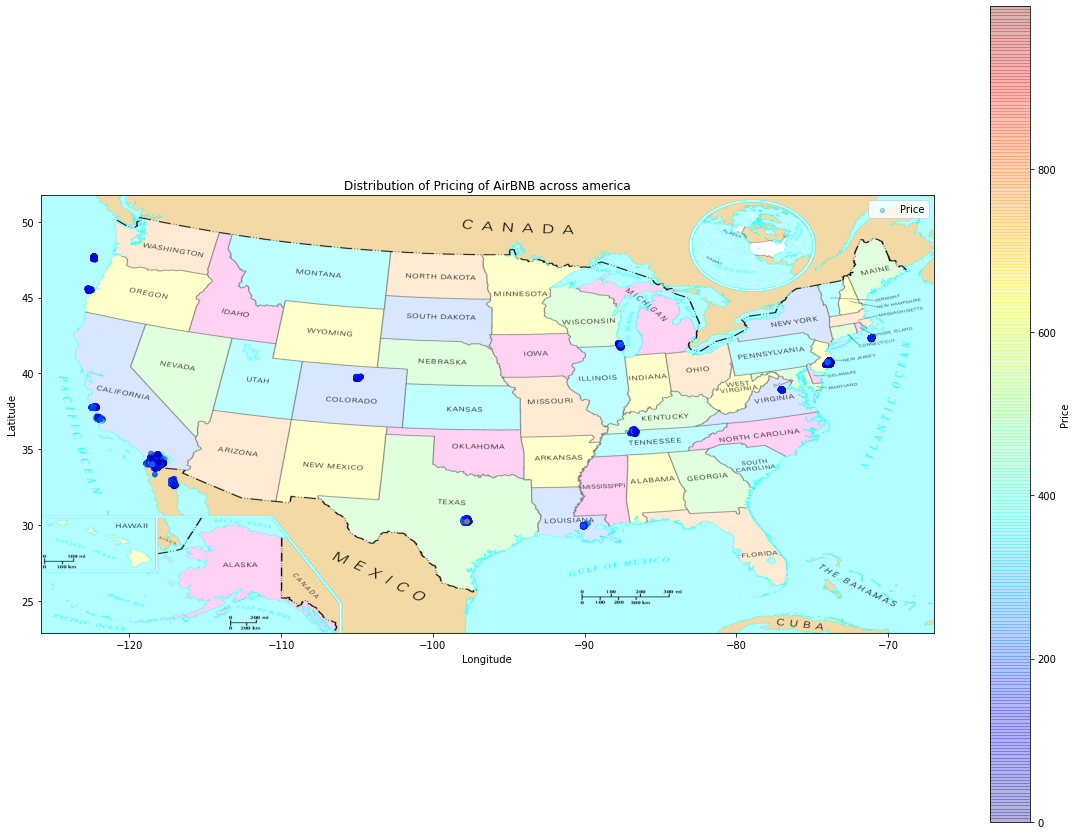

In [257]:
import urllib
import matplotlib.pyplot as plt
#figure size
plt.figure(figsize=(20,15))
#open wiki image if new york 
i=urllib.request.urlopen('https://4.bp.blogspot.com/-ki2LqIwilas/T4iLL3rK47I/AAAAAAAAABM/PZu4Ar1ojfg/s1600/US%2BMap%2B04.png')
img=plt.imread(i)
#scaling the image based on lat and long
plt.imshow(img,zorder=0,extent=[-125.833981, -67.000100, 22.909851,51.733358])
ax=plt.gca()
#scatterolot
df.plot(kind='scatter', x='Longitude', y='Latitude', label='Price', c='Price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.3, zorder=10)
plt.title('Distribution of Pricing of AirBNB across america')
plt.legend()
plt.show()